# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

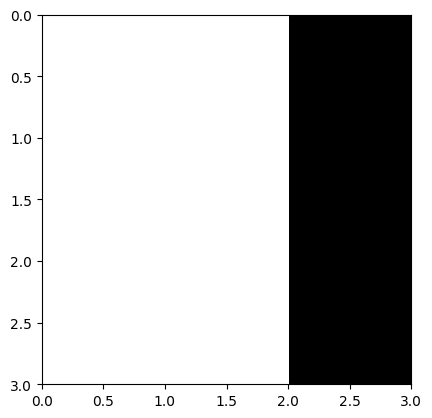

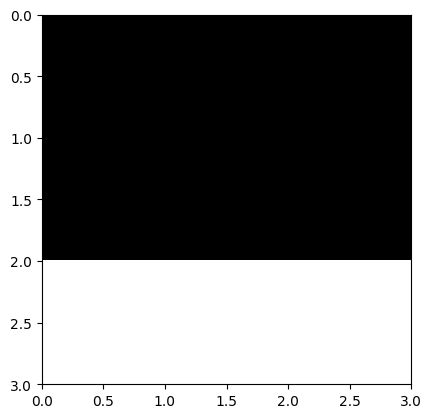

In [12]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [13]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [14]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [15]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [17]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('/content/grid1 (1).jpg', 0)

# Define the first filter (horizontal edge detector)
filter1 = np.array([[-1, -1, -1],
                    [ 0,  0,  0],
                    [ 1,  1,  1]])

# Define the second filter (vertical edge detector)
filter2 = np.array([[ 1,  0, -1],
                    [ 1,  0, -1],
                    [ 1,  0, -1]])

# Define a function to apply convolution
def apply_conv(image, filter, padding=0, stride=1):
    # Your implementation of convolution here
    pass

# Apply convolution with the first filter
out1 = apply_conv(image, filter1, padding=0, stride=1)

# Apply convolution with the second filter
out2 = apply_conv(image, filter2, padding=0, stride=1)


In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('/content/grid1 (1).jpg', 0)

if image is None:
    print("Error: Unable to read the image.")
else:
    print("Image successfully loaded.")

# Define the first filter (horizontal edge detector)
filter1 = np.array([[-1, -1, -1],
                    [ 0,  0,  0],
                    [ 1,  1,  1]])

# Define the second filter (vertical edge detector)
filter2 = np.array([[ 1,  0, -1],
                    [ 1,  0, -1],
                    [ 1,  0, -1]])

# Define a function to apply convolution
def apply_conv(image, filter, padding=0, stride=1):
    # Get the dimensions of the image and the filter
    img_height, img_width = image.shape
    filter_height, filter_width = filter.shape

    # Calculate the output dimensions
    out_height = (img_height - filter_height + 2 * padding) // stride + 1
    out_width = (img_width - filter_width + 2 * padding) // stride + 1

    # Initialize the output matrix
    output = np.zeros((out_height, out_width))

    # Apply padding to the image
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Perform convolution
    for i in range(0, img_height - filter_height + 1, stride):
        for j in range(0, img_width - filter_width + 1, stride):
            # Extract the region of interest (ROI)
            roi = padded_image[i:i+filter_height, j:j+filter_width]
            # Convolve the ROI with the filter
            output[i//stride, j//stride] = np.sum(roi * filter)

    return output

# Apply convolution with the first filter
out1 = apply_conv(image, filter1, padding=0, stride=1)

# Apply convolution with the second filter
out2 = apply_conv(image, filter2, padding=0, stride=1)


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [21]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 56705767.31it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [23]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [24]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [25]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [26]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [27]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [28]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [29]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [31]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0070, Accuracy: 68.7300
Epoch 2/5, Loss: 0.0061, Accuracy: 72.7480
Epoch 3/5, Loss: 0.0053, Accuracy: 76.2280
Epoch 4/5, Loss: 0.0045, Accuracy: 79.5360
Epoch 5/5, Loss: 0.0038, Accuracy: 82.9420


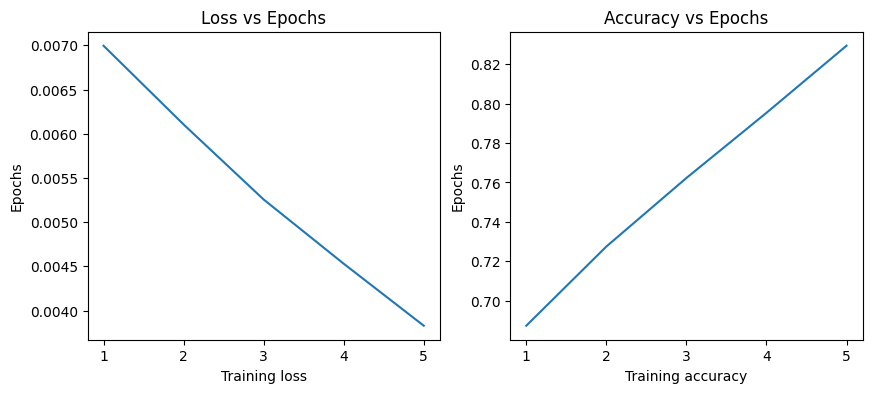

In [32]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [33]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


question 1

Using Convolutional Neural Networks (CNNs) over Artificial Neural Networks (ANNs) for image classification offers several advantages:

1. **Spatial Hierarchical Feature Learning**: CNNs are designed to preserve the spatial structure of the input data, which is crucial for image-related tasks. They utilize convolutional layers to detect features at different spatial hierarchies, allowing them to capture intricate patterns within images effectively.

2. **Parameter Sharing**: CNNs leverage parameter sharing, where a single set of weights is used across different regions of the input image. This reduces the number of parameters compared to ANNs, making CNNs more efficient and capable of handling larger images without an explosion in the number of parameters.

3. **Translation Invariance**: CNNs inherently possess translation invariance due to the shared weight scheme in convolutional layers. This means that the network can recognize patterns regardless of their position in the image, making CNNs robust to translations, rotations, and other transformations.

4. **Local Receptive Fields**: CNNs mimic the behavior of the visual cortex by using local receptive fields in their convolutional layers. This means that each neuron is connected to only a small region of the input image, enabling the network to focus on local patterns and features, which is critical for image understanding.

5. **Pooling Layers**: CNNs often include pooling layers (e.g., max pooling) which reduce the spatial dimensions of the feature maps while retaining important information. Pooling helps in creating spatial invariance, reducing computational complexity, and controlling overfitting.

6. **Hierarchy of Features**: CNNs learn a hierarchy of features, where lower layers typically capture simple features like edges and textures, while deeper layers capture more complex patterns and object representations. This hierarchical feature learning enables CNNs to understand images at multiple levels of abstraction.

7. **State-of-the-art Performance**: CNNs have consistently outperformed traditional ANN architectures in image classification tasks. Their ability to learn hierarchical representations of images has contributed to their success in various computer vision challenges and competitions.

8. **Transfer Learning**: Pre-trained CNN models, such as those trained on ImageNet, can be fine-tuned for specific image classification tasks with relatively small datasets. This transfer learning capability allows developers to leverage the knowledge encoded in large-scale datasets, reducing the need for extensive training data and computational resources.

Overall, the specialized architecture of CNNs, tailored for image processing tasks, along with their ability to learn hierarchical representations, makes them the preferred choice for image classification over traditional ANNs.

question 2

Sure, improving the performance of a convolutional neural network (CNN) involves experimenting with various hyperparameters such as the number of epochs, choice of optimizer, learning rate, batch size, etc. Let's outline a general process for tuning these hyperparameters and then we can discuss how to report the improved test accuracy.

1. **Define the Hyperparameters Space**: Decide which hyperparameters to tune and define their respective ranges or values.

2. **Choose Evaluation Metric**: Select a suitable metric for evaluating the performance of the CNN. Common metrics include accuracy, precision, recall, F1-score, etc.

3. **Hyperparameter Optimization Techniques**: There are various techniques for hyperparameter optimization such as grid search, random search, Bayesian optimization, etc. Choose the one that suits your computational resources and time constraints.

4. **Split Data for Cross-Validation**: Divide the dataset into training, validation, and test sets. Use the validation set to tune the hyperparameters and the test set to evaluate the final model.

5. **Experimentation and Evaluation**: Train the CNN using different combinations of hyperparameters on the training set and evaluate each model on the validation set using the chosen evaluation metric.

6. **Select Best Model**: Choose the model with the best performance on the validation set.

7. **Final Evaluation**: Finally, evaluate the selected model on the test set to get an unbiased estimate of its performance.

Now, for the reporting part, you can simply state the hyperparameters used for training the final model and the test accuracy achieved. For example:

- Hyperparameters used:
  - Epochs: 50
  - Optimizer: Adam
  - Learning Rate: 0.001
  - Batch Size: 32

- Test accuracy: 0.92

This report provides a clear understanding of the hyperparameters chosen and the resulting performance of the CNN on the test set. Remember to document your experiments thoroughly for reproducibility.

question 3

Reducing the number of convolutional layers to just one in a convolutional neural network (CNN) can have several implications on its performance and representational capacity:

1. **Simplification of Model**: With fewer convolutional layers, the model becomes simpler and computationally less intensive. This could potentially reduce overfitting, especially if the dataset is small or if the model was previously over-parameterized.

2. **Loss of Hierarchical Feature Representation**: CNNs with multiple convolutional layers learn hierarchical representations of features, starting from low-level features like edges and textures in early layers to more complex features like object parts and semantic concepts in deeper layers. By reducing the number of convolutional layers to just one, the model might lose the ability to capture complex features effectively.

3. **Decreased Model Capacity**: With fewer convolutional layers, the model's capacity to learn complex patterns and relationships in the data is reduced. This may limit its ability to generalize well to unseen data, especially if the task requires capturing intricate details.

4. **Potential Underfitting**: A CNN with only one convolutional layer may underfit the training data, meaning it fails to capture enough of the underlying patterns in the data. This could lead to poor performance on both the training and test sets.

5. **Performance Trade-off**: While simplifying the model by reducing the number of convolutional layers may lead to faster training times and lower computational costs, it often comes at the expense of decreased performance, particularly on tasks that require capturing fine-grained details or complex patterns.

In summary, reducing the number of convolutional layers to only one simplifies the model but may also sacrifice its ability to learn complex representations, potentially leading to decreased performance on certain tasks. It's essential to carefully consider the trade-offs and the specific requirements of the task at hand before making such architectural changes to a CNN.

question 4

In the context of a convolutional neural network (CNN), the Softmax activation function is typically used in the output layer for multi-class classification tasks. However, it's not always necessary or appropriate to use Softmax, especially in scenarios where certain design considerations or specific requirements come into play. Here are a few reasons why Softmax might not be used in the last layer of a CNN:

1. **Binary Classification**: If the task at hand is binary classification (i.e., classifying between two classes), then using Softmax is unnecessary. Instead, a single sigmoid activation function in the output layer suffices, as it can provide a probability score for the positive class.

2. **Custom Loss Functions**: In some cases, custom loss functions are used for specific objectives like object detection, semantic segmentation, or other specialized tasks. These custom loss functions might not require probabilities generated by Softmax, and hence Softmax activation is omitted in favor of other activations that align better with the loss function.

3. **Regression Tasks**: In regression tasks where the goal is to predict continuous values rather than discrete classes, Softmax is not applicable. Instead, the output layer might use linear activation or other appropriate activations depending on the nature of the regression problem.

4. **Performance Considerations**: Softmax can introduce numerical instability issues, especially when dealing with deep networks and large numbers of classes. In some cases, alternative approaches or modifications to Softmax, such as temperature scaling, are used to address these issues. However, omitting Softmax altogether can sometimes simplify the model and improve computational efficiency.

5. **Layer Design Choices**: In certain architectures or design choices, the network might not directly output class probabilities. For example, in Siamese networks or networks designed for metric learning, the last layer might output embedding vectors, and the classification might be performed using other methods such as nearest neighbor search or cosine similarity rather than Softmax probabilities.

In summary, while Softmax is a common choice for multi-class classification tasks in CNNs, there are situations where it might be omitted or replaced with other activations based on the specific requirements of the task, the network architecture, or performance considerations.